# Scikit - learn
1. 데이터 전처리
- MinMax Scaler
- fit()
- transform()

2. KNN Classfier
- fit()
- score()
- predict()

## KNN Iris Binary Classification(2진분류)
---

### 데이터 준비

In [966]:
# !pip install scikit-learn --user

In [967]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

warnings.filterwarnings(action='ignore') 

In [968]:
# iris = pd.read_csv('iris.csv', index_col=0) 
# df = iris.drop(['ID'], axis=1)
iris = pd.read_csv('iris.csv')

iris.shape

(150, 6)

In [969]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [970]:
df = iris.drop(['Id'], axis = 1).copy()

In [971]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [972]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [973]:
# df.columns = [x.lower() for x in df.columns]

In [974]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [975]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [976]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [977]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [978]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [979]:
df['species'].map({
'Iris-setosa':0,
'Iris-versicolor':1,
'Iris-virginica':2
})

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [980]:
df['species'] = df['species'].map({
'Iris-setosa':0,
'Iris-versicolor':1,
'Iris-virginica':2
})

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [981]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [982]:
df.groupby(['species'])['sepal_length'].mean()

species
0    5.006
1    5.936
2    6.588
Name: sepal_length, dtype: float64

In [983]:
x = df.iloc[:,:-1] 
# 다른 방법으로 x = df.drop(['species'], axis = 1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [984]:
y = df.iloc[:,-1]
y.reset_index()
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [985]:
x.shape, y.shape
# y의 shape 결과가 (150,)가 아닌 (150,1)이 나오면
# 시리즈가 아닌 데이터프레임으로 만든것으로 나중에 오류가 발생한다.
# y의 shape 결과는 (150,)이 되어야 한다.

((150, 4), (150,))

## 테스트 데이터 분리

In [986]:
# 8:2 , 검사 정확도를 위해 shuffle을 써서 데이터 내용(순서)를 섞는다

In [987]:
from sklearn.utils import shuffle

In [988]:
x, y = shuffle(x, y)

In [989]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
78,6.0,2.9,4.5,1.5
146,6.3,2.5,5.0,1.9
84,5.4,3.0,4.5,1.5
96,5.7,2.9,4.2,1.3
27,5.2,3.5,1.5,0.2


In [990]:
num = int(150 * 0.8)
# 인덱싱할때 int자료형의 변수를 넣어주어야 하는데
# float자료형의 변수를 넣으면 오류가 발생한다.

x_train = x.iloc[:120,:]
# 120
# x_train = x.iloc[:num,:]으로 써도된다
x_test = x.iloc[120:,:]
# 30
y_train = y.iloc[:120]
# 120
y_test = y.iloc[120:]
# 30

In [991]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


### 정규화
- min-max (최소 - 최대 정규화)
- standardization (표준화)

<img src="https://blog.kakaocdn.net/dn/eb41Pu/btqBowKg4pk/HTKoxdu3KHUpVJnAXCyKX0/img.png" width="80%" height="80%"/>

In [992]:
# test모델은 건들지 말것
# m은 평균, 분모는 표준편차

In [993]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
78,6.0,2.9,4.5,1.5
146,6.3,2.5,5.0,1.9
84,5.4,3.0,4.5,1.5
96,5.7,2.9,4.2,1.3
27,5.2,3.5,1.5,0.2


In [994]:
# 정규화 작업 실습

def scale(x):
    mu = x_train[x].mean() # mu 평균
    std = x_train[x].std() # std 표준편차
    x_train[x] = (x_train[x]-mu)/std

scale(x.columns)

'''
for col in x.columns:
    mu = x_train[col].mean() # mu 평균
    std = x_train[col].std() # std 표준편차
    x_train[col] = (x_train[col]-mu)/std
'''

'\nfor col in x.columns:\n    mu = x_train[col].mean() # mu 평균\n    std = x_train[col].std() # std 표준편차\n    x_train[col] = (x_train[col]-mu)/std\n'

In [995]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,3.700743e-16,1.0,-1.770559,-0.905868,-0.041176,0.699989,2.552900
sepal_width,120.0,8.456199e-16,1.0,-2.505772,-0.624974,-0.154774,0.550525,3.136624
petal_length,120.0,-1.110223e-16,1.0,-1.411627,-1.241437,0.290268,0.800836,1.821973
petal_width,120.0,-8.511710e-17,1.0,-1.397482,-1.166038,0.189564,0.850833,1.776610


In [996]:
x_train = x_train.values
y_train = y_train.values

In [997]:
type(x_train), type(y_train)
# 데이터프레임 타입이였던 x_train을
# 원래 변수에 값들만 저장하여 / x_train = x_train.values
# 타입이 ndarray 타입으로 변경되었다.

(numpy.ndarray, numpy.ndarray)

### 테스트 데이터

### 데이터 전처리 함수

In [1018]:
def get_iris(mode = None):
    #iris = pd.read_csv('iris.csv')
    
    df = iris.drop(['Id'], axis = 1).copy()
    
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
    
    if(mode == 'bin'):
        df = df.loc[df['species'] != 'Iris-virginica']
    
    df['species'] = df['species'].map({
    'Iris-setosa':0,
    'Iris-versicolor':1,
    'Iris-virginica':2})
    
    x = df.iloc[:,:-1] 
    y = df.iloc[:,-1]
    
    x, y = shuffle(x, y)
    
    num = int(len(y)*0.8)
# x는 데이터 프레임, y는 시리즈이므로
# y의 length값, len(y)를 이용하여 다른 데이터를 끌어와도 사용할 수 있게끔
# 변수를 설정하여 num변수를 통해 데이터 값을 설정한다.
    
    x_train = x.iloc[:num,:]
    x_test = x.iloc[num:,:]
    y_train = y.iloc[:num]
    y_test = y.iloc[num:]
    
    def scale(x):
        mu = x_train[x].mean() # mu 평균
        std = x_train[x].std() # std 표준편차
        x_train[x] = (x_train[x]-mu)/std
        x_test[x] = (x_test[x]-mu)/std
# 테스트 데이터로 평균, 표준편차를 내서 test원본 데이터를 따로 정규화하면 
# 성능은 좋아지지만, 대회같은곳에서 실격처리 당한다.
# 학습 데이터로 평균 표준편차 구한 것을 test원본 데이터도 정규화 할 것.

    scale(x.columns)

    
    return x_train, x_test, y_train, y_test

In [999]:
x_train, x_test, y_train, y_test = get_iris('bin')

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


# 2클래스 데이터 준비

In [1000]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [1001]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [1002]:
iris.drop(iris.loc[iris['Species']=='Iris-virginica'].index, axis=0)
# df = df.loc[df['species'] != 'Iris-virginica'] 로 써도 된다.

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [1003]:
iris = iris.iloc[:100,:]
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


In [1004]:
x_train, x_test, y_train, y_test = get_iris('bin')


print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(80, 4) (20, 4)
(80,) (20,)


In [1005]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

In [1006]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier()

# 평가

In [1007]:
# 테스트

clf.score(x_test, y_test)
# 1.0은 100% 다 맞다는 뜻.

1.0

In [1008]:
clf.score(x_train, y_train)

1.0

In [1009]:
# 예측 값
y_pred = clf.predict(x_test)

In [1010]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [1011]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [1012]:
# y_pred, y_test 정확도 계산
(y_pred == y_test).sum()/len(y_test)

# 아래 평가지표랑 똑같은 것이므로 둘중 하나 사용하면 된다.

1.0

In [1013]:
# 평가지표 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
# accuracy 정확도 precision 정밀도 recall 재현율

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print('accuraccy:', acc)
print('precision:', pre)
print('recall:', rec)

accuraccy: 1.0
precision: 1.0
recall: 1.0


In [1014]:
def print_score(y_true, y_pred):
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print('accuraccy:', acc)
    print('precision:', pre)
    print('recall:', rec)

In [1015]:
print_score(y_test, y_pred)

accuraccy: 1.0
precision: 1.0
recall: 1.0


# 혼동행렬(Confusion Matrix)

In [1016]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[10,  0],
       [ 0, 10]], dtype=int64)

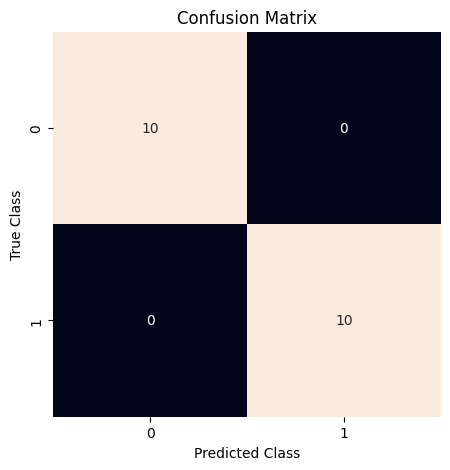

In [1017]:
plt.figure(figsize=(5,5))
sns.heatmap(cfm, annot = True, cbar = False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# True Class 에서 정답은 1인데
# Predicted Class 에서 0, 정답은 0으로 예측한 것은 
# annot를 통해 나온 수치데이터가 0이므로
# 정답은 1인데 정답을 0으로 예측한 것은 0개이다 라고 해석 할 수 있음.